<a href="https://colab.research.google.com/github/haydaramru/Digital-Signal-Processing/blob/main/WindowFIR_Kaiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from numpy import cos, sin,pi,arange,absolute

In [ ]:
# Create some signals

sampling_rate = 100
nsamples = 400

t = arange(nsamples)/sampling_rate

x1 = cos(2*pi*0.5*t)+0.2*sin(2*pi*2.5*t*0.1)
x2 = 0.2*sin(2*pi*15.3*t)+0.1*sin(2*pi*16.7*t+0.1)
x3 = 0.1*sin(2*pi*23.45*t+0.8)

x= x1+x2+x3

In [ ]:
# Create FIR filter

nyq_rate = sampling_rate/2.0
width = 5.0/nyq_rate
ripple_db =60.0

N,beta =signal.kaiserord(ripple_db,width)
fc_hz =10.0
taps = signal.firwin(N,fc_hz/nyq_rate,window=('kaiser',beta))
filtered_x = signal.lfilter(taps,1.0,x)
print(len(taps))

74


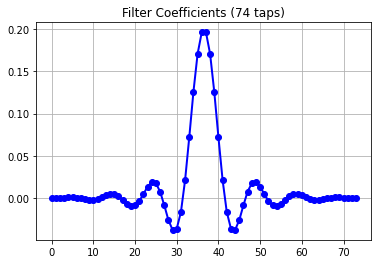

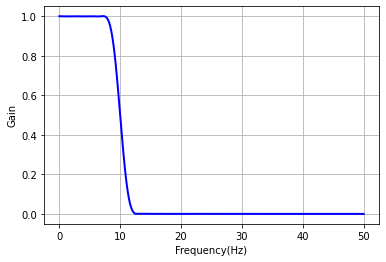

In [ ]:
plt.figure(1)
plt.plot(taps,'bo-',linewidth=2)
plt.title('Filter Coefficients (%d taps)'%N)
plt.grid()

plt.figure(2)

w,h = signal.freqz(taps,worN=8000)
plt.plot((w/pi)*nyq_rate,absolute(h),linewidth=2,color='blue')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Gain')
plt.ylim(-0.05,1.05)
plt.grid()

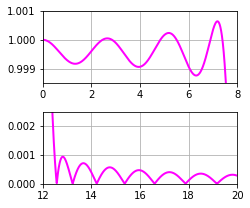

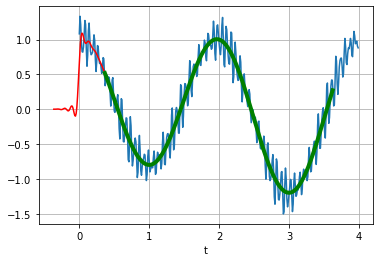

In [ ]:
# upper inset plot
ax1 = plt.axes([0.42,0.6,0.45,0.25])
plt.plot((w/pi)*nyq_rate,absolute(h),linewidth=2,color='magenta')
plt.xlim(0,8.0)
plt.ylim(0.9985,1.001)
plt.grid()

# lower inset plot
ax2 = plt.axes([0.42,0.25,0.45,0.25])
plt.plot((w/pi)*nyq_rate,absolute(h),linewidth=2,color='magenta')
plt.xlim(12.0,20.0)
plt.ylim(0.0,0.0025)
plt.grid()

delay = 0.5*(N-1)/sampling_rate
plt.figure(3)
plt.plot(t,x)
plt.plot(t-delay,filtered_x,'r-')

plt.plot(t[N-1:]-delay, filtered_x[N-1:],'g',linewidth=4)
plt.xlabel('t')
plt.grid()

plt.show()